<a href="https://colab.research.google.com/github/norulwahab/nor_python_ml/blob/main/Malaria_cnn_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten, InputLayer,BatchNormalization, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [21]:
dataset, dataset_info=tfds.load('malaria',with_info=True, as_supervised=True,shuffle_files=True, split=['train'])

In [22]:
def splits(dataset, TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset

In [23]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)


##Data Visualization##

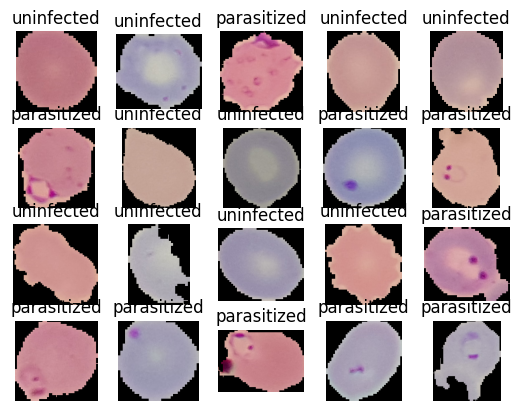

In [24]:
for i, (image, label) in enumerate(train_dataset.take(20)):
  plt.subplot(4,5,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

##Processing##


In [25]:
IMAGE_SIZE=224
def resize_rescale(image,label):
  return tf.image.resize(image, (IMAGE_SIZE,IMAGE_SIZE))/255.0,label

In [26]:
train_dataset=train_dataset.map(resize_rescale)
val_dataset=val_dataset.map(resize_rescale)
test_dataset=test_dataset.map(resize_rescale)
# for image,label in train_dataset.take(1):
#   print(image,label)

In [27]:
train_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [28]:
val_dataset=val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [29]:
test_dataset=test_dataset.batch(1)

##Model Creation and Training


In [30]:
lenet_model=tf.keras.models.Sequential([
                                      InputLayer(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),

                                      Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
                                      BatchNormalization(),
                                      MaxPooling2D(pool_size=2, strides=2),

                                      Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
                                      BatchNormalization(),
                                      MaxPooling2D(pool_size=2, strides=2),

                                      Flatten(),
                                      Dense(100, activation='relu'),
                                      BatchNormalization(),
                                      Dense(10, activation='relu'),
                                      BatchNormalization(),

                                      Dense(1, activation='sigmoid')
                                      ])
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

In [31]:
lenet_model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(),metrics='accuracy')

In [32]:
history= lenet_model.fit(train_dataset,validation_data= val_dataset,epochs=20,verbose=1)

Epoch 1/20
689/689 [==============================] - 997s 1s/step - loss: 0.3805 - accuracy: 0.8293 - val_loss: 0.3722 - val_accuracy: 0.8868
Epoch 2/20
689/689 [==============================] - 982s 1s/step - loss: 0.2264 - accuracy: 0.9160 - val_loss: 0.2975 - val_accuracy: 0.9198
Epoch 3/20
689/689 [==============================] - 1002s 1s/step - loss: 0.2012 - accuracy: 0.9273 - val_loss: 0.2390 - val_accuracy: 0.9274
Epoch 4/20
689/689 [==============================] - 993s 1s/step - loss: 0.1652 - accuracy: 0.9420 - val_loss: 0.2489 - val_accuracy: 0.9354
Epoch 5/20
689/689 [==============================] - 953s 1s/step - loss: 0.1440 - accuracy: 0.9508 - val_loss: 0.2830 - val_accuracy: 0.9249
Epoch 6/20
689/689 [==============================] - 986s 1s/step - loss: 0.1237 - accuracy: 0.9580 - val_loss: 0.3473 - val_accuracy: 0.9082
Epoch 7/20
689/689 [==============================] - 957s 1s/step - loss: 0.1086 - accuracy: 0.9613 - val_loss: 0.1755 - val_accuracy: 0.948

<ipython-input-33-2e8b6b8ce6d7>:6: UserWarning: The label '_' of 'o' starts with '_'. It is thus excluded from the legend.
  plt.legend('Training_Loss','Validation_Loss')
<ipython-input-33-2e8b6b8ce6d7>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training_Loss','Validation_Loss')


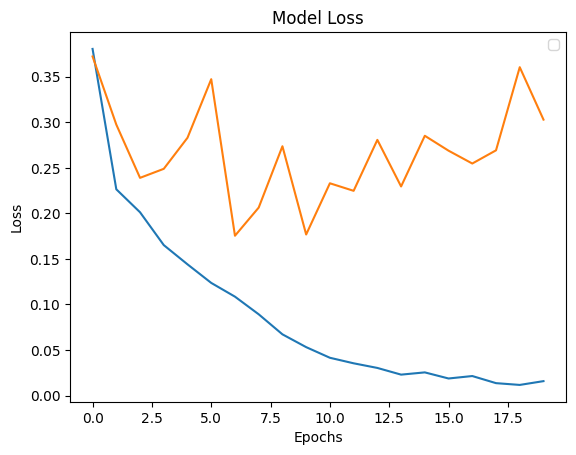

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('Training_Loss','Validation_Loss')
plt.show()

<ipython-input-34-857611124634>:6: UserWarning: The label '_' of 'c' starts with '_'. It is thus excluded from the legend.
  plt.legend('Training_Accuracy','Validation_Accuracy')
<ipython-input-34-857611124634>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training_Accuracy','Validation_Accuracy')


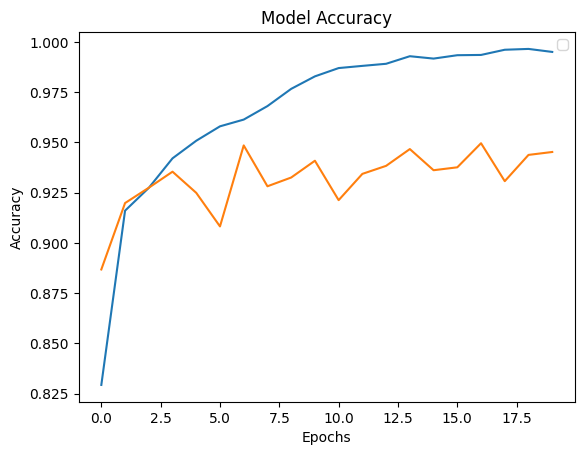

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend('Training_Accuracy','Validation_Accuracy')
plt.show()

In [35]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 73s 22ms/step - loss: 0.3608 - accuracy: 0.9376


[0.360822468996048, 0.9376133680343628]

In [36]:
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 13s 13s/step


0.9999993

In [1]:
def infected_or_not(x):
  if(x<0.5):
    return str('I')
  else:
    return str('U')

In [ ]:
for i,(image,label) in enumerate(test_dataset.take(160)):
  plt.subplot(8,20,i+1)
  plt.imshow(image[0])
  plt.title(str(infected_or_not(label.numpy()[0])) + ':' +str(infected_or_not(lenet_model.predict(image)[0][0])))
  plt.axis('off')